In [8]:
import pandas as pd
df = pd.read_csv("C:/Users/ahmed/Downloads/Train (6).csv")
df.info()
df.head()
df.isnull().sum()
df.describe()
{col: df[col].unique() for col in df.select_dtypes(include=['object']).columns}


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


{'Item_Identifier': array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
       dtype=object),
 'Item_Fat_Content': array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object),
 'Item_Type': array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
        'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
        'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
        'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object),
 'Outlet_Identifier': array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
        'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object),
 'Outlet_Size': array(['Medium', nan, 'High', 'Small'], dtype=object),
 'Outlet_Location_Type': array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object),
 'Outlet_Type': array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
        'Supermarket Type3'], dtype=object)}

In [4]:
# Fill missing Item_Weight with mean
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)

# Standardize Item_Fat_Content
fat_content_map = {'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'}
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(fat_content_map)

# Fill missing Outlet_Size with mode
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0], inplace=True)

# Convert categorical columns to category dtype
categorical_cols = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
for col in categorical_cols:
    df[col] = df[col].astype('category')

# Feature: Outlet_Age
import datetime
current_year = datetime.datetime.now().year
df['Outlet_Age'] = current_year - df['Outlet_Establishment_Year']

# Drop Item_Identifier
df.drop('Item_Identifier', axis=1, inplace=True)
df.head()


C:\Users\ahmed\AppData\Local\Temp\ipykernel_7952\538317726.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)
C:\Users\ahmed\AppData\Local\Temp\ipykernel_7952\538317726.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,26
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,16
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,26
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,27
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,38


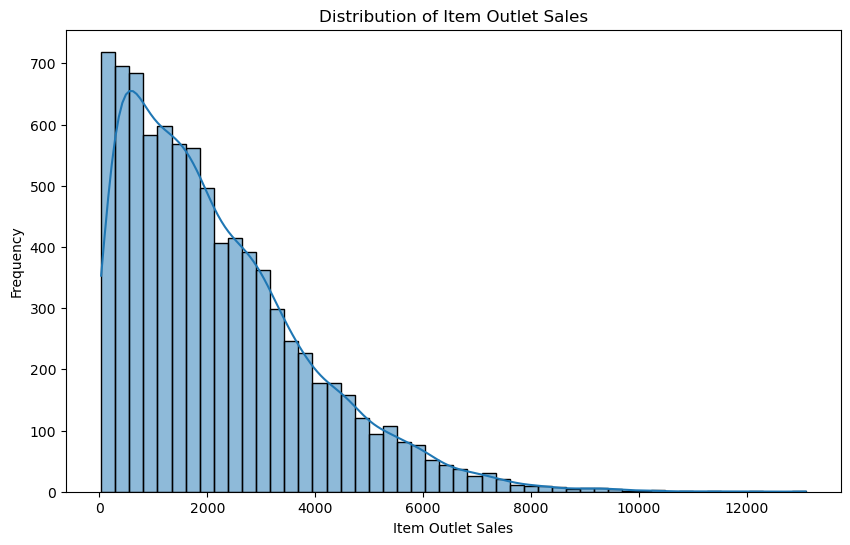

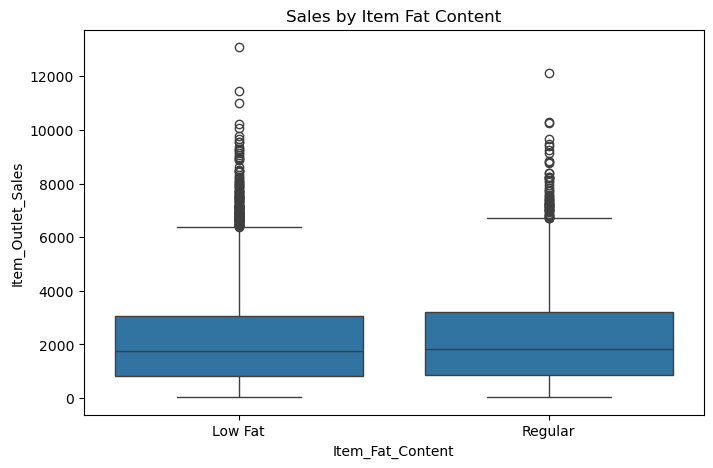

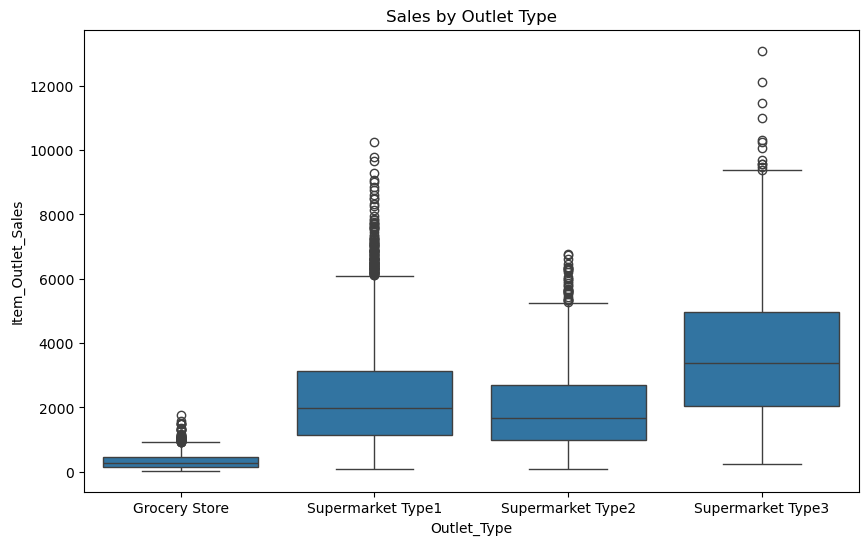

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Item_Outlet_Sales
plt.figure(figsize=(10,6))
sns.histplot(df['Item_Outlet_Sales'], bins=50, kde=True)
plt.title('Distribution of Item Outlet Sales')
plt.xlabel('Item Outlet Sales')
plt.ylabel('Frequency')
plt.show()

# Sales by Item_Fat_Content
plt.figure(figsize=(8,5))
sns.boxplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=df)
plt.title('Sales by Item Fat Content')
plt.show()

# Sales by Outlet_Type
plt.figure(figsize=(10,6))
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df)
plt.title('Sales by Outlet Type')
plt.show()


In [6]:
# One-hot encoding for categorical variables
encoded_df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
encoded_df.head()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Age,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,26,False,False,False,False,...,False,False,True,True,False,False,False,True,False,False
1,5.92,0.019278,48.2692,2009,443.4228,16,True,False,False,False,...,False,False,False,True,False,False,True,False,True,False
2,17.50,0.016760,141.6180,1999,2097.2700,26,False,False,False,False,...,False,False,True,True,False,False,False,True,False,False
3,19.20,0.000000,182.0950,1998,732.3800,27,True,False,False,False,...,False,False,False,True,False,False,True,False,False,False
4,8.93,0.000000,53.8614,1987,994.7052,38,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import datetime


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import datetime

# Load the dataset
df = pd.read_csv("C:/Users/ahmed/Downloads/Train (6).csv")

# Check missing values
print("Missing values:\n", df.isnull().sum())

# Handle missing values
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)

# Standardize Item_Fat_Content
fat_content_map = {'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'}
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(fat_content_map)

# Fill missing Outlet_Size with mode
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0], inplace=True)


Missing values:
 Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


C:\Users\ahmed\AppData\Local\Temp\ipykernel_7952\1265414242.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)
C:\Users\ahmed\AppData\Local\Temp\ipykernel_7952\1265414242.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

In [10]:
# Create Outlet_Age feature
current_year = datetime.datetime.now().year
df['Outlet_Age'] = current_year - df['Outlet_Establishment_Year']

# Normalize Item_Visibility (handle zero visibility)
item_avg_visibility = df.groupby('Item_Type')['Item_Visibility'].mean()
for item_type in df['Item_Type'].unique():
    visibility_mean = item_avg_visibility[item_type]
    df.loc[(df['Item_Type'] == item_type) & (df['Item_Visibility'] == 0), 'Item_Visibility'] = visibility_mean
    
df['Item_Visibility_Normalized'] = df['Item_Visibility'] / df.groupby('Item_Type')['Item_Visibility'].transform('mean')

# Create Item_MRP_Category
df['Item_MRP_Category'] = pd.qcut(df['Item_MRP'], q=4, labels=['Budget', 'Economy', 'Mid-Range', 'Premium'])


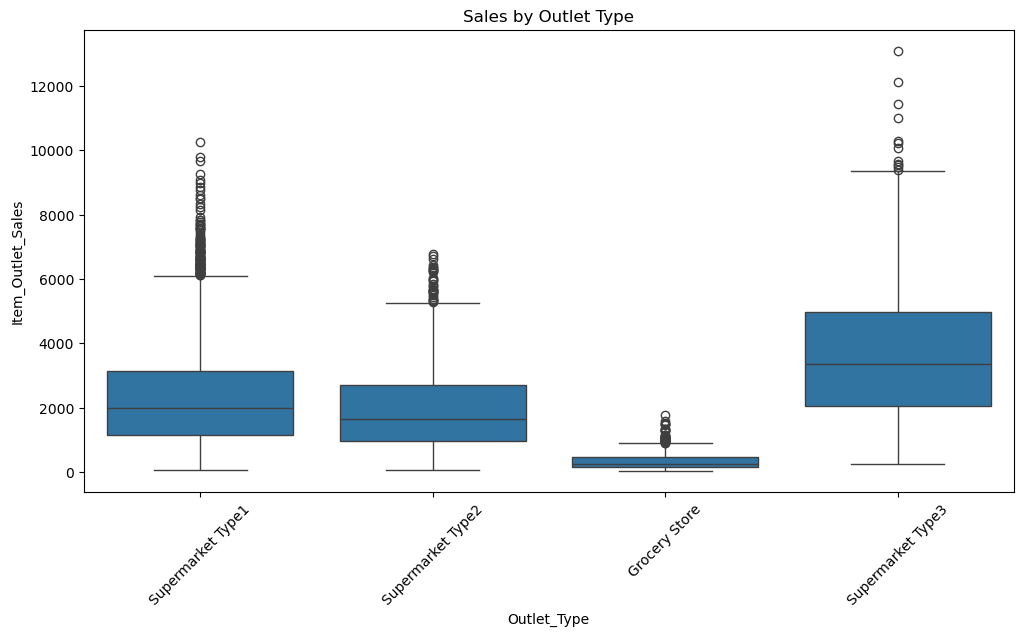

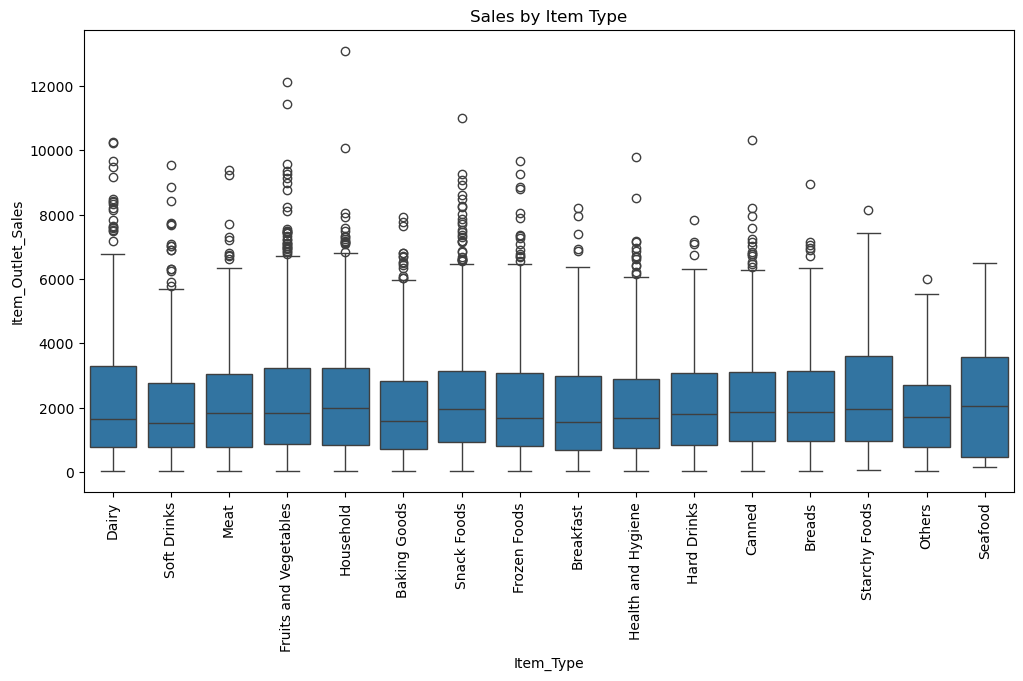

In [11]:
# Visualize key relationships
plt.figure(figsize=(12, 6))
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df)
plt.title('Sales by Outlet Type')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=df)
plt.title('Sales by Item Type')
plt.xticks(rotation=90)
plt.show()


In [12]:
# Define features and target
X = df.drop(['Item_Outlet_Sales', 'Item_Identifier'], axis=1)
y = df['Item_Outlet_Sales']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessor
numerical_features = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Age', 'Item_Visibility_Normalized']
categorical_features = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 
                        'Outlet_Location_Type', 'Outlet_Type', 'Item_MRP_Category']

# Create transformers for different column types
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define models to try
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Train and evaluate models
results = {}

for name, model in models.items():
    # Create pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    # Train model
    pipeline.fit(X_train, y_train)
    
    # Predict and evaluate
    y_pred = pipeline.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {'RMSE': rmse, 'R2': r2}
    print(f"{name} - RMSE: {rmse:.2f}, R2: {r2:.4f}")


Random Forest - RMSE: 1075.41, R2: 0.5745
Gradient Boosting - RMSE: 1035.77, R2: 0.6053


In [13]:
# Select the best model (assuming Gradient Boosting performed better)
from sklearn.model_selection import GridSearchCV

# Parameter grid for Gradient Boosting
param_grid = {
    'model__n_estimators': [100, 200],
    'model__learning_rate': [0.05, 0.1],
    'model__max_depth': [3, 5]
}

# Create pipeline with preprocessor and model
gb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', GradientBoostingRegressor(random_state=42))
])

# Grid search
grid_search = GridSearchCV(gb_pipeline, param_grid, cv=3, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best parameters and performance
print("Best parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
tuned_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
tuned_r2 = r2_score(y_test, y_pred)
print(f"Tuned model - RMSE: {tuned_rmse:.2f}, R2: {tuned_r2:.4f}")


Best parameters: {'model__learning_rate': 0.05, 'model__max_depth': 3, 'model__n_estimators': 100}
Tuned model - RMSE: 1028.06, R2: 0.6111


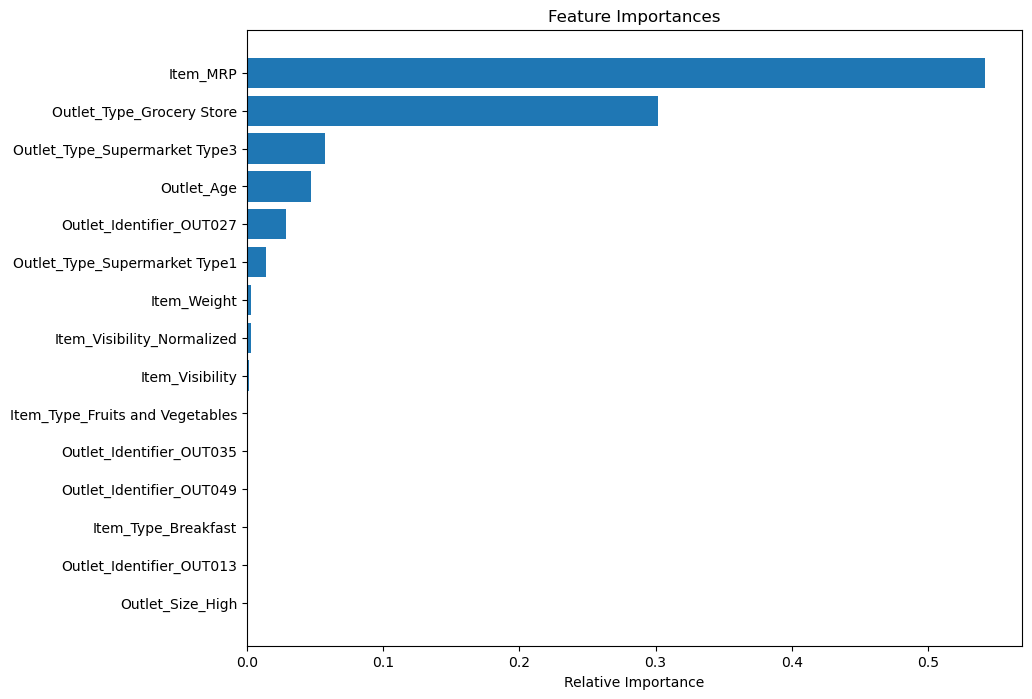

In [14]:
# Get feature names after preprocessing
def get_feature_names(column_transformer):
    output_features = []
    
    for name, pipe, features in column_transformer.transformers_:
        if name != 'remainder':
            if name == 'cat':
                output_features.extend(pipe.named_steps['onehot'].get_feature_names_out(features))
            else:
                output_features.extend(features)
                
    return output_features

feature_names = get_feature_names(best_model.named_steps['preprocessor'])
importances = best_model.named_steps['model'].feature_importances_

# Plot top 15 features
indices = np.argsort(importances)[-15:]
plt.figure(figsize=(10, 8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


In [15]:
# Function for making predictions on new data
def predict_sales(model, new_data):
    """
    Predict sales for new data points
    
    Parameters:
    -----------
    model: trained pipeline model
    new_data: DataFrame with same features as training data
    
    Returns:
    --------
    numpy array with sales predictions
    """
    # Prepare data (drop unnecessary columns if present)
    if 'Item_Outlet_Sales' in new_data.columns:
        new_data = new_data.drop('Item_Outlet_Sales', axis=1)
    if 'Item_Identifier' in new_data.columns:
        new_data = new_data.drop('Item_Identifier', axis=1)
    
    # Make predictions
    return model.predict(new_data)

# Example usage
sample_data = X_test.iloc[:5].copy()
predictions = predict_sales(best_model, sample_data)
print("\nSample predictions:")
for i, pred in enumerate(predictions):
    print(f"Sample {i+1}: Predicted Sales = ${pred:.2f}")

# Save the model for deployment
import joblib
joblib.dump(best_model, 'sales_prediction_model.pkl')
print("Model saved as 'sales_prediction_model.pkl'")



Sample predictions:
Sample 1: Predicted Sales = $1300.81
Sample 2: Predicted Sales = $737.90
Sample 3: Predicted Sales = $763.63
Sample 4: Predicted Sales = $4734.80
Sample 5: Predicted Sales = $3198.15
Model saved as 'sales_prediction_model.pkl'
